In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

cm.update('livereveal', {
              'width': "90%",
              'height': "90%",
              'scroll': True,
})

import warnings
warnings.filterwarnings('ignore')

bShowInline = True  # Set = False for document generation
%matplotlib inline
import matplotlib.pyplot as plt

<img src="Figs2019/Banner.png" width="100%" />
<font face="Calibri">
<br>
<font size="7"> <b> Synthetic Aperture Radar Interferometry <b> </font>

<font size="5"> <b> Principles, Phenomenology, and Theory <font color='rgba(200,0,0,0.2)'> </font> </b> </font>

<br> <img src="Figs2019/NASALogo.png" width="250" align="right" /> <br> 
<font size="4"> <b> Paul A Rosen</b> 
<font size="3">  <br>
<font> <b>Date: </b> August 8, 2019 </font>
</font>


Contributors to content include: Scott Hensley, Anthony Freeman, Jakob van Zyl, Piyush Agram, Howard Zebker

This notebook presents the basics of synthetic aperture radar interferometry. The student will be exposed to:
    
1. What is Radar?
2. Basic definitions
3. What is Synthetic Aperture Radar?
4. Properties of Radar Images
5. What is Synthetic Aperture Radar Interferometry?
6. What other modalities of SAR are important?
7. What is range-Doppler geometry, why is it important, and how does it relate to geographic coordinates?
8. SAR Interferometry Theory
9. Decorrelation Theory



## Lecture Outline


### First Segment: Radar Imaging Fundamentals


1. <font color='green'>Basic Principles of Radar and SAR</font>
2. <font color='green'>Properties of Radar Images</font>

Second Segment: Geometric Aspects of Interferometry and Interferometric Phase

1. Topographic Mapping
2. Deformation Mapping
3. Phase Unwrapping and Atmosphere

Third Segment: Interferometric Correlation

1. SNR and Interferometric Correlation
2. Geometric, Temporal, Volumetric Decorrelation


## Introduction and Motivation

You are reading this because you are interested in the geodetic aspects of synthetic aperture radar (SAR), particularly interferometric synthetic aperture radar (InSAR).  From a technical perspective, SAR and InSAR are quite complex, and even to experts in the field be a source of wonder as to how an instrument that illuminates a very large footprint on the ground can deliver almost arbitrarily fine resolution images, and relative motions of image points over time at mm to cm accuracy.  This can be illustrated by first looking at an "image" of the raw data before processing.





![label](Figs2019/Slide003.png)

![label](Figs2019/Slide004.png)

![label](Figs2019/Slide005.png)

![label](Figs2019/Slide006.png)

![label](Figs2019/Slide007.png)

![label](Figs2019/Slide008.png)

![label](Figs2019/Slide009.png)

![label](Figs2019/Slide010.png)

![label](Figs2019/Slide012.png)

![label](Figs2019/Slide013.png)

**Table of Radar and Spacecraft Parameters and constants used for any computed examples in this notebook**

| Parameter | Symbol | Value | Comment |
| --- | --- | --- | --- | 
| Wavelength | $\lambda $ | 0.24 m | (L-band)  
| Antenna Length | $L_a$ | 10 m | |  
| Antenna Width | $W_a$ | 2 m | |  
| Off-nadir boresight angle | $\theta_l$ | 30$^\circ$ | |
| Azimuth squint of  boresight angle | $\theta_{sq}$ | 0$^\circ$ | |
| Spacecraft Velocity | $v_{sc}$ | 7,500 m/s | Assumed constant |
| Spacecraft Altitude | $h_{sc}$ | 750,000 m | Assumed constant | 
| Radar Range Bandwidth | $B_r$ | 10 MHz | |
| Radar Pulse Duration | $\tau_r$ | 20 $\mu$s | Determines average power |
| Nominal Pulse Rate | $f_p$ | 1600 Hz | Determines average power and ambiguity levels |
| Peak Power on Transmit | $P_T$ | 4,000 W | Determines SNR |
| Radar Noise Temperature | $T_r$ | 300 K | Determines SNR |
| Corner Reflector Dimension | $L_{cr}$ | 2.4 m | Determines SNR |
| Speed of light         | $c $  | 299792456 m/s | |  
| Boltzman constant      | $k$   | 1.38064852 $\times$ 10$^{-23}$ m$^2$ kg s$^{-2}$ K$^{-1}$ | -228.6 dB |  
| Gravitational Constant | $G$   | 6.672 $\times$ 10$^{-11}$ m$^3$ kg$^{−1}$ s$^{−2}$ | |  
| Earth's Mass           | $M_E$ | 5.9742 $\times$ 10$^{24}$ kg | |

In [2]:
import numpy as np
Lambda = 0.24
L_a = 10.
W_a = 2. 
theta_l = 30. * np.pi/180.
theta_sq = 0. * np.pi/180.
v_sc = 7500.
h_sc = 750000. 
B_r = 20.e6
tau_r = 10.e-6
f_p = 1600.
P_T = 4000.
T_r = 300.
L_cr =2.4
c = 299792456 
k = 1.38064852e-23
G = 6.672e-11
M_E = 5.9742e24

![label](Figs2019/Slide018.png)

![label](Figs2019/Slide014.png)

## Range coding to achieve better resolution

If it is not possible to transmit a narrow enough pulse with sufficient power to achieve the desired results, it is customary to transmit a coded waveform in the pulse to create a broader bandwidth to the pulsed signal.  The resolution is then the reciprocal of the bandwidth. 

In [3]:
rho = h_sc / np.cos(theta_l)
Delta_rho_taur = c *  tau_r / 2.
Delta_rho_Br   = c * (1./B_r) / 2.

In [4]:
print("Spacecraft altitude =","{:.2f}".format(h_sc),"m")
print("Pulse length =","{:.2f}".format(1.e6*tau_r),"microsec")
print("Pulse Bandwidth=","{:.2f}".format(1.e-6*B_r),"MegaHertz")
print("Range from spacecraft to boresight intersection with ground =","{:.2f}".format(rho),"m")
print("Range resolution based on pulse duration = ""{:.2f}".format(Delta_rho_taur),"m")
print("Range resolution based on bandwidth of coded range pulse = ""{:.2f}".format(Delta_rho_Br),"m")

Spacecraft altitude = 750000.00 m
Pulse length = 10.00 microsec
Pulse Bandwidth= 20.00 MegaHertz
Range from spacecraft to boresight intersection with ground = 866025.40 m
Range resolution based on pulse duration = 1498.96 m
Range resolution based on bandwidth of coded range pulse = 7.49 m


![label](Figs2019/Slide019.png)

## Ground Resolution Variability with Swath and Terrain

In [5]:
tau_p = 0.
theta=np.linspace(25.,45.,100)
Delta_rhog_Br = Delta_rho_Br / np.sin((theta-tau_p) * np.pi / 180.)
tau_p = 10.
Delta_rhog_Br_10deg = Delta_rho_Br / np.sin((theta-tau_p) * np.pi / 180.)
tau_p = 20.
Delta_rhog_Br_20deg = Delta_rho_Br / np.sin((theta-tau_p) * np.pi / 180.)

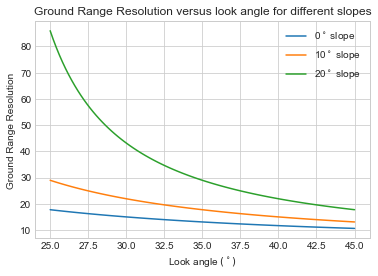

In [6]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.plot(theta,Delta_rhog_Br,label='0$^\circ$ slope')
plt.plot(theta,Delta_rhog_Br_10deg,label='10$^\circ$ slope')
plt.plot(theta,Delta_rhog_Br_20deg,label='20$^\circ$ slope')
plt.xlabel("Look angle $(^\circ)$")
plt.ylabel("Ground Range Resolution ")
plt.title("Ground Range Resolution versus look angle for different slopes")
plt.legend(loc='best');

![label](Figs2019/Slide016.png)

## Some Example Beam Dimensions

In [7]:
theta_3db_az = 0.866 * Lambda / L_a  # 0.866 factor typically more representative of actual 3dB point
theta_3db_el = 0.866 * Lambda / W_a
Delta_X_az = rho * theta_3db_az
Delta_X_el = rho * theta_3db_el / np.cos(theta_l)

In [8]:
print("Antenna Length in azimuth (along track) =","{:.2f}".format(L_a),"m")
print("Antenna Width in elevation (perp to boresight and azimuth)=","{:.2f}".format(W_a),"m")
print("Azimuth beamwidth =","{:.2f}".format(180.*theta_3db_az/np.pi),"degrees")
print("Elevation beamwidth =","{:.2f}".format(180.*theta_3db_el/np.pi),"degrees")
print("Azimuth beam extent at reference range =","{:.2f}".format(Delta_X_az),"m")
print("Elevation beam extent at reference range =","{:.2f}".format(Delta_X_el),"m")

Antenna Length in azimuth (along track) = 10.00 m
Antenna Width in elevation (perp to boresight and azimuth)= 2.00 m
Azimuth beamwidth = 1.19 degrees
Elevation beamwidth = 5.95 degrees
Azimuth beam extent at reference range = 17999.47 m
Elevation beam extent at reference range = 103920.00 m


![label](Figs2019/Slide022.png)

In [9]:
%%html
<video width=960 controls autoplay>
    <source src="Figs2019/SAR.mp4" type="video/mp4"/>
</video>

![label](Figs2019/Slide029.png)

## Azimuth Resolution Example

The two-way propagation of the signal from spacecraft to ground and back again gives a factor of two greater Doppler bandwidth extent across the azimuth beam than one might expect.  Thus the synthetic aperture length can be thought of as twice the illuminated swath extent.

In [10]:
# allow for some playing with parameters locally. 

theta_3db_az = 0.866 * Lambda / L_a  # 0.866 factor typically more representative of actual 3dB point
Delta_X_az = rho * theta_3db_az
SynAp_az = 2. * Delta_X_az
theta_SynAp = 0.866 * Lambda / SynAp_az
delta_x_SynAp = rho * theta_SynAp



In [11]:
print("Azimuth antenna length =","{:.2f}".format(L_a),"m")
print("Azimuth beam extent at reference range illuminating a target =","{:.2f}".format(Delta_X_az),"m")
print("Synthetic aperture length (effective) =","{:.2f}".format(SynAp_az),"m")
print("Synthetic aperture effective beamwidth =","{:.3f}".format(1000.*180.*theta_SynAp/np.pi),"millidegrees")
print("Synthetic aperture resolution =","{:.3f}".format(delta_x_SynAp),"m")

Azimuth antenna length = 10.00 m
Azimuth beam extent at reference range illuminating a target = 17999.47 m
Synthetic aperture length (effective) = 35998.94 m
Synthetic aperture effective beamwidth = 0.331 millidegrees
Synthetic aperture resolution = 5.000 m


![label](Figs2019/Slide027.png)

![label](Figs2019/Slide028.png)

![label](Figs2019/Slide028a.png)

![label](Figs2019/Slide028b.png)

## Learning more about SAR 

We have developed a comprehensive notebook that covers Synthetic Aperture Radar Theory and Processing Methods in much greater detail.  

It is included in the set of course notebooks under the "notebooks/SAR Processor Tutorial" folder. This notebook 
- simulates radar echoes from point targets
- develops the radar equation and the signal-to-noise ratio of corner reflector targets
- develops the range and azimuth signals and processing methods analytically and computationally. 
- describes linear FM signals and range compression
- describes Doppler and synthetic aperture concepts, including range migration
- contrasts standard range doppler processing methods to time domain approaches


![label](Figs2019/Slide033.png)

![label](Figs2019/Slide034.png)

![label](Figs2019/Slide034a.png)

![label](Figs2019/Slide035.png)

![label](Figs2019/Slide036.png)

![label](Figs2019/Slide037.png)

![label](Figs2019/Slide038.png)

![label](Figs2019/Slide039.png)

![label](Figs2019/Slide040.png)

![label](Figs2019/Slide041.png)

![label](Figs2019/Slide042.png)

![label](Figs2019/Slide043.png)

![label](Figs2019/Slide044.png)

## Lecture Outline 
The lecture is divided into three segments:
First Segment: Radar Imaging Fundamentals
1. Basic Principles of Radar and SAR
2. Properties of Radar Images

### Second Segment: Geometric Aspects of Interferometry and Interferometric Phase

1. <font color='green'>Topographic Mapping</font>
2. <font color='green'>Deformation Mapping</font>
3. <font color='green'>Phase Unwrapping and Atmosphere</font>

Third Segment: Interferometric Correlation

1. SNR and Interferometric Correlation
2. Geometric, Temporal, Volumetric Decorrelation





![label](Figs2019/Slide047.png)

![label](Figs2019/Slide048.png)

![label](Figs2019/Slide049.png)

![label](Figs2019/Slide050.png)

![label](Figs2019/Slide051.png)

![label](Figs2019/Slide052.png)

![label](Figs2019/Slide053.png)

![label](Figs2019/Slide054.png)

![label](Figs2019/Slide055.png)

![label](Figs2019/Slide056.png)

![label](Figs2019/Slide057.png)

![label](Figs2019/Slide058.png)

![label](Figs2019/Slide059.png)

![label](Figs2019/Slide060.png)

![label](Figs2019/Slide061.png)

## Phase Gradient

* For a number of applications including flight planning and unwrapping studies it is desirable to be able to compute the interferometric phase gradient for an arbitrarily sloped surface, look geometry and baseline.

* The interferometric phase is well approximated for most applications  by
\begin{equation*}
\Delta\phi = -\frac{2\pi p}{\lambda} \langle \vec{b}, \vec{l} \rangle
\end{equation*}
where  $\vec{b}$ is the baseline vector,  $\vec{l}$ a unit vector pointing to the target and $\lambda$ is the wavelength, and $\langle , \rangle$ is the inner, or dot, product.

* The phase gradient is
\begin{equation*}
\nabla\Delta\phi =  \begin{bmatrix}\frac{\partial \Delta\phi}{\partial s} \\ \frac{\partial\Delta\phi}{\partial \rho} \end{bmatrix}
=  -\frac{2\pi p}{\lambda} \begin{bmatrix}\langle \vec{b}, \frac{\partial\vec{l}}{\partial s} \rangle \\ \langle \vec{b}, \frac{\partial\vec{l}}{\partial \rho} \rangle \end{bmatrix}
\end{equation*}
where $s$ is the along track coordinate and $\rho$ is the range.

## Phase Gradient Observations

* There in a change in phase with respect to range regardless of whether the terrain is sloped in the range direction or not. The phase rate, or fringe rate, with respect to a flat surface is called the flat surface (or spherical earth) fringe frequency. 

\begin{equation*}
\frac{\partial\Delta\phi}{\partial \rho} = \frac{2\pi p}{\lambda} \frac{b \cos(\theta - \alpha)}{\rho\tan(\theta -\psi_c)} =\frac{2\pi p}{\lambda} \frac{b_\perp}{\rho\tan(\theta -\psi_c)}
\end{equation*}

* Note that the fringe rate depends on the local slope and the perpendicular baseline length.

* The fringe rate in the azimuth or along track direction is zero unless there is an azimuth slope. It also depends on the magnitude of the local slope and the perpendicular baseline length

\begin{equation*}
\frac{\partial\Delta\phi}{\partial s} = \frac{2\pi p}{\lambda} \frac{b \cos(\theta - \alpha)}{\rho} \sin(\theta)\tan(\psi_s) =\frac{2\pi p}{\lambda} \frac{b_\perp}{\rho} \sin(\theta)\tan(\psi_s)
\end{equation*}


## Flattened Phase

In many interferometric workflows, either through explicit motion compensation to a common reference of images as they are formed, or at some later point in the interferogram formation,  the flat Earth fringes are removed, leaving an interferogram with fringes that are proportional to the topography.  These are referred to as "flattened phase" or "flattened fringes".

The flattened phase is given by 

\begin{equation}
\Delta\phi_{flat} = - \frac {2 \pi p}{\lambda}\bigg( \langle\hat{l},\vec{b}\rangle - \langle\hat{l}_0,\vec{b}\rangle \bigg)
\end{equation}

where $\hat{l}$ is the look vector to a point and $\hat{l}_0$ is the corresponding look vector to the flat surface at the same range.

Making the usual 2-dimensional simplification, 

\begin{eqnarray}
\Delta\phi_{flat} & = & \frac {2 \pi p}{\lambda} b \big(\sin(\theta-\alpha) - \sin(\theta_0-\alpha) \big) \\
 & \approx & \frac {2 \pi p}{\lambda} b \cos(\theta-\alpha) \delta\theta \\
 & \approx & \frac {2 \pi p}{\lambda} b_{\perp} \delta\theta \\
 \end{eqnarray}

## Flattened phase (cont.)


From the figure we have 
\begin{equation}
\delta\theta \approx \frac{h_T}{\rho\sin\theta_0}
\end{equation}

<br> <img src="Figs2019/intgeom.png" width="350" align="left" /> <br> 
which gives 

\begin{eqnarray}
\Delta\phi_{flat} & \approx & \frac {2 \pi p}{\lambda} b_{\perp} \delta\theta \\
                  & \approx & \frac {2 \pi p}{\lambda} b_{\perp} \frac{h_T}{\rho\sin\theta_0} \\
\end{eqnarray}

## Sensitivity of Height with Respect to Phase

* Sensitivity to Phase:
$\frac{\partial\vec{T}}{\partial\Delta\phi} = \frac{-\lambda\rho\sin\theta}{2 \pi p b \cos(\theta-\alpha)} \begin{bmatrix} 0\\ \cos \theta \\ \sin \theta \end{bmatrix} \qquad \qquad p=1,2$

<br> <img src="Figs2019/sens.png" width="350" align="left" /> <br> 

* Ambiguity Height:
\begin{equation}
h_a = 2\pi \frac{\partial\vec{T_z}}{\partial\Delta\phi} = \frac{-\lambda\rho}{2 \pi p b \cos(\theta-\alpha)} 
\end{equation}

Observe that 
\begin{equation}
\frac{\partial\vec{T}}{\partial\Delta\phi}
\end{equation}
is parallel to 
\begin{equation}
\hat{l} \times \hat{v}
\end{equation}



![label](Figs2019/Slide068.png)

![label](Figs2019/Slide069.png)

![label](Figs2019/Slide070.png)

![label](Figs2019/Slide071.png)

# Differential Interferometry Sensitivities

* Differential interferometry can detect millimeter level surface deformation

* Differential phase is much more sensitive to displacements than to topography

$\qquad \qquad{\rm Topographic \ Sensitivity:} \frac{\partial\Delta\phi}{\partial h} = \frac{2\pi p b \cos(\theta-\alpha)}{\lambda \rho \sin \theta}$

$\qquad \qquad{\rm Displacement \ Sensitivity:} \frac{\partial\Delta\phi}{\partial \Delta\rho} = \frac{4\pi}{\lambda}$

* Since $b/\rho \ll 1$, it takes a much larger change in $h$ than in $\Delta\rho$ to affect a change in $\Delta\phi$

* "Meter-scale topography - millimeter scale topographic change"

![label](Figs2019/Slide075.png)

![label](Figs2019/Slide077.png)

![label](Figs2019/Slide078.png)

![label](Figs2019/Slide079.png)

![label](Figs2019/Slide080.png)

![label](Figs2019/Slide081.png)

![label](Figs2019/Slide082.png)

![label](Figs2019/Slide084.png)

## Phase Unwrapping Algorithms

ISCE Supports several popular phase unwrapping approaches:

- Standard Residue - branch cut - methods as described above
    - ISCE support a single-image version and a patch-based algorithm for extra long files

- Minimum cost flow algorithms that pose the unwrapping problem as a network flow problem (snaphu from Stanford University)

- Secondary phase unwrapping of connected components

![label](Figs2019/Slide090.png)

## Interferometric Error Sources

Intrinsic <br>
- Propagation delay errors from atmosphere and ionosphere
- Phase unwrapping errors
- Interferometric decorrelation <br>

Imaging System related
- Layover and shadow in radar imagery from slant range geometry
- Multiple scattering within and among resolution cells
- Range and azimuth ambiguities due to design constraints
- Range and azimuth sidelobes due to bandwidth/resolution constraints
- Multipath and channel cross-talk noise as low-level interference
- Calibration errors


![label](Figs2019/Slide086.png)

![label](Figs2019/Slide087.png)

![label](Figs2019/Slide089.png)

![label](Figs2019/Slide092.png)

![label](Figs2019/Slide093.png)

# Lecture Outline
    
The lecture is divided into three segments:


First Segment: Radar Imaging Fundamentals

1. Basic Principles of Radar and SAR
2. Properties of Radar Images


Second Segment: Geometric Aspects of Interferometry and Interferometric Phase

1. Topographic Mapping
2. Deformation Mapping
3. Phase Unwrapping and Atmosphere

## Third Segment: Interferometric Correlation

1. <font color='green'>SNR and Interferometric Correlation</font>
2. <font color='green'>Geometric, Temporal, Volumetric Decorrelation</font>



![label](Figs2019/Slide094.png)

![label](Figs2019/Slide095.png)

![label](Figs2019/Slide096.png)

![label](Figs2019/Slide097.png)

![label](Figs2019/Slide098.png)

![label](Figs2019/Slide099.png)

![label](Figs2019/Slide100.png)

![label](Figs2019/Slide101.png)

![label](Figs2019/Slide102.png)

![label](Figs2019/Slide103.png)

![label](Figs2019/Slide104.png)

![label](Figs2019/Slide105.png)

![label](Figs2019/Slide106.png)

![label](Figs2019/Slide107.png)

![label](Figs2019/Slide108.png)

![label](Figs2019/Slide109.png)

![label](Figs2019/Slide110.png)

![label](Figs2019/Slide111.png)

![label](Figs2019/Slide113.png)

![label](Figs2019/Slide114.png)

# Other Resources: 


* Treatise on Geophysics, Interferometric Synthetic Aperture Radar Geodesy (2015), Simons M. and Rosen, P.; Schubert, G. (ed.), 2nd Ed., Volume 3- Geodesy, Elsevier Press, 339-385; http://web.gps.caltech.edu/~simons/publications/pdfs/Simons_etal_2015.pdf


* Synthetic Aperture Radar Interferometry (2000) Rosen, P. A.; Hensley, S.; Joughin, I. R.; Li, F. K.; Madsen, S. N.; Rodriquez, E. & Goldstein, R. M. Proc. IEEE, 88, 333-382


* Synthetic Aperture Radar Interferometry to measure Earth's surface topography and its deformation (2000) Burgmann, R.; Rosen, P. & Fielding, E. Ann.~Rev.~Earth Planet.~Sci., 28, 169-209

* Synthetic Aperture Radar Interferometry: Principles and Applications (1999) Madsen, S. N. & Zebker, H. A., Manual of Remote Sensing, Artech House, 3


* Radar interferometry and its application to changes in the earth's surface (1998) Massonnet, D. & Feigl, K. L., Reviews of Geophysics, 36, 441-500


* Synthetic Aperture Radar Interferometry (1998) Bamler, R. & Hartl, P., Inverse Problems, 14, 1-54


* Remote Sensing with Imaging Radar (2009) Richards, J.A., Springer. 
